In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pathlib
from plotnine import *
from plotnine.data import *
import plotnine
import numpy as np
import plotnine as gg
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [4]:
import click
import logging
from dotenv import find_dotenv, load_dotenv
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import json
from pathlib import Path

In [7]:
path_bike_df = pathlib.Path("hour.csv")

In [12]:
bike_df = pd.read_csv(path_bike_df)

In [13]:
bike_df.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [15]:
bike_df.count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

In [14]:
bike_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379,NaN,NaN,NaN,8690,5017.03,1,4345.5,8690,13034.5,17379
dteday,17379,731,2012-10-12,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379,NaN,NaN,NaN,2.50164,1.10692,1,2,3,3,4
yr,17379,NaN,NaN,NaN,0.502561,0.500008,0,0,1,1,1
mnth,17379,NaN,NaN,NaN,6.53778,3.43878,1,4,7,10,12
hr,17379,NaN,NaN,NaN,11.5468,6.91441,0,6,12,18,23
holiday,17379,NaN,NaN,NaN,0.0287704,0.167165,0,0,0,0,1
weekday,17379,NaN,NaN,NaN,3.00368,2.00577,0,1,3,5,6
workingday,17379,NaN,NaN,NaN,0.682721,0.465431,0,0,1,1,1
weathersit,17379,NaN,NaN,NaN,1.42528,0.639357,1,1,1,2,4


In [17]:
bike_df.dropna().count()

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64

C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 53'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


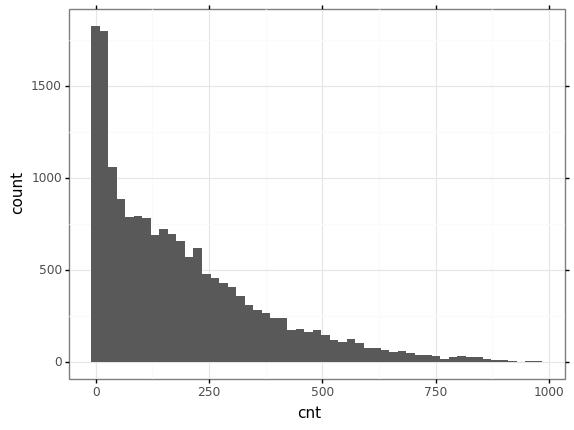

C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:706: UserWarning: Saving 20 x 6 in image.
  from_inches(height, units), units))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:707: UserWarning: Filename: cnt_histogram.png
  warn('Filename: {}'.format(filename))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 53'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


<ggplot: (-9223371867575405904)>


C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:722: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


In [20]:
cnt_hist = gg.ggplot(bike_df, gg.aes(x="cnt")) + gg.geom_histogram() + gg.ggtitle("Dviračių naudojimosi histograma")
print(age_hist + gg.theme_bw())
age_hist.save("cnt_histogram.png", width=20, height=6)

C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\stats\stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 53'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
C:\Users\ugnej\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


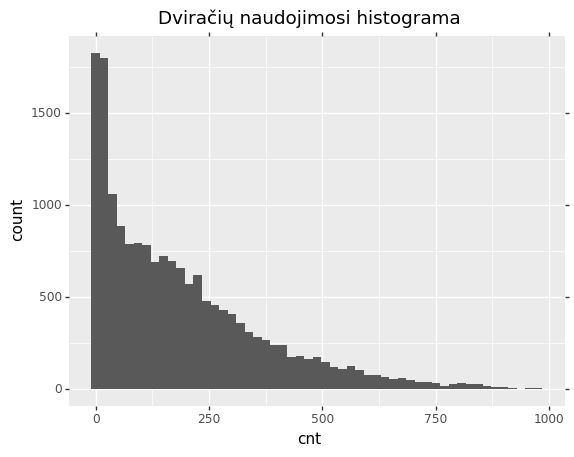

<ggplot: (-9223371867579110288)>

In [26]:
gg.ggplot(bike_df, gg.aes(x="cnt")) + gg.geom_histogram() + gg.ggtitle("Dviračių naudojimosi histograma")

C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 39'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


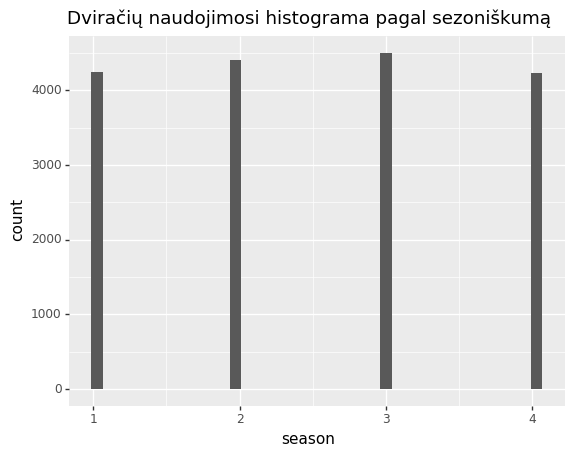

<ggplot: (-9223371880611688132)>

In [324]:
gg.ggplot(bike_df, gg.aes(x="season")) + gg.geom_histogram() + gg.ggtitle("Dviračių naudojimosi histograma pagal sezoniškumą")

C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 109'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


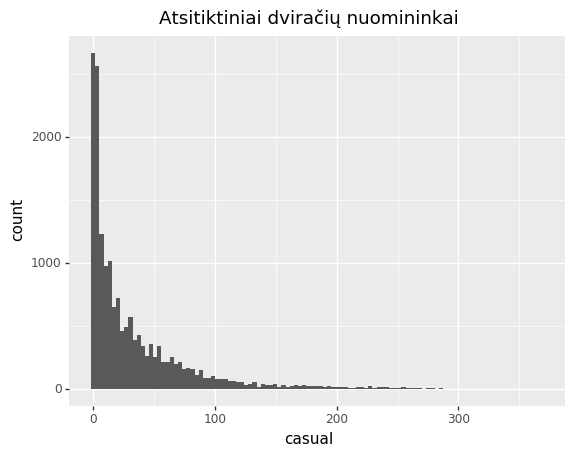

<ggplot: (-9223371880611422524)>

In [325]:
gg.ggplot(bike_df, gg.aes(x="casual")) + gg.geom_histogram() + gg.ggtitle("Atsitiktiniai dviračių nuomininkai")

C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 62'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


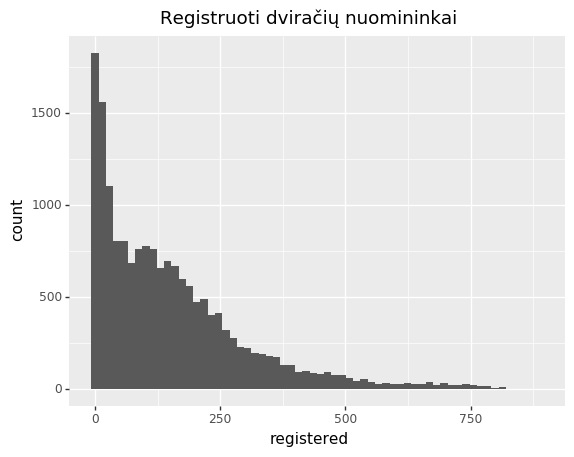

<ggplot: (-9223371880611687540)>

In [326]:
gg.ggplot(bike_df, gg.aes(x="registered")) + gg.geom_histogram() + gg.ggtitle("Registruoti dviračių nuomininkai")

In [327]:
import plotnine as gg
import numpy as np
 
for col in bike_df.columns:
    path = "C:/Users/Paulius/Desktop/Python/Python projektas/" + col + ".png"
    hist = gg.ggplot(bike_df, gg.aes(x=col)) + gg.geom_histogram()
    #print(age_hist + gg.theme_bw())
    hist.save(path)

C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/Paulius/Desktop/Python/Python projektas/instant.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 26'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)
C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/Paulius/Desktop/Python/Python projektas/dteday.png
  warn(

C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/Paulius/Desktop/Python/Python projektas/windspeed.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 74'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)
C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\Paulius\Anaconda3\envs\bank-tele\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/Paulius/Desktop/Python/Python projektas/casual.png
  war

In [68]:
bike_df['mnth'] = bike_df.mnth.astype('category')

In [69]:
bike_df['workingday'] = bike_df.workingday.astype('category')

In [70]:
bike_df['weekday'] = bike_df.weekday.astype('category')

In [71]:
bike_df['weathersit'] = bike_df.weathersit.astype('category')

In [72]:
bike_df['yr'] = bike_df.yr.astype('category')

In [73]:
bike_df['season'] = bike_df.season.astype('category')

In [74]:
# Assigning numerical values and storing in another column
bike_df['mnth_cat'] = bike_df['mnth'].cat.codes
bike_df['workingday_cat'] = bike_df['workingday'].cat.codes
bike_df['weekday_cat'] = bike_df['weekday'].cat.codes
bike_df['weathersit_cat'] = bike_df['weathersit'].cat.codes
bike_df['yr_cat'] = bike_df['yr'].cat.codes
bike_df['season_cat'] = bike_df['season'].cat.codes

In [75]:
bike_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,26,27,28,29,30,mnth_cat,workingday_cat,weekday_cat,weathersit_cat,yr_cat
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,6,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,6,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,6,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,6,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,1.0,1.0,0.0,0.0,0.0,11,1,1,1,1
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,1.0,1.0,0.0,0.0,0.0,11,1,1,1,1
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,1.0,1.0,0.0,0.0,0.0,11,1,1,0,1
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,1.0,1.0,0.0,0.0,0.0,11,1,1,0,1


In [76]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

In [77]:
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(bike_df[['mnth', 'workingday', 'weekday',
                                                 'weathersit', 'yr', 'season_cat']]).toarray())

In [78]:
# merge with main df bike_df on key values
bike_df = bike_df.join(enc_df)
bike_df

ValueError: columns overlap but no suffix specified: Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype='object')

In [79]:
bike_df["season_cat"].describe()

count    17379.000000
mean         1.501640
std          1.106918
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: season_cat, dtype: float64

In [80]:
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,26,27,28,29,30,mnth_cat,workingday_cat,weekday_cat,weathersit_cat,yr_cat
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,6,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,6,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,6,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,6,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,6,0,0


In [81]:
bike_data_df = bike_df.drop('season', axis=1)

In [82]:
bike_data_df.shape

(17379, 53)

In [83]:
bike_df.shape

(17379, 54)

In [84]:
set(bike_df.columns).difference(bike_data_df.columns)

{'season'}

In [85]:
X = bike_data_df.drop('season_cat', axis=1)
y = bike_data_df['season_cat']

In [86]:
seed = 200

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed, stratify=y)

In [88]:
X_train.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,26,27,28,29,30,mnth_cat,workingday_cat,weekday_cat,weathersit_cat,yr_cat
3162,3163,2011-05-16,0,5,16,0,1,1,3,0.60,...,0.0,0.0,1.0,0.0,0.0,4,1,1,2,0
8969,8970,2012-01-14,1,1,14,0,6,0,1,0.24,...,1.0,1.0,0.0,0.0,0.0,0,0,6,0,1
14626,14627,2012-09-06,1,9,15,0,4,1,1,0.74,...,1.0,0.0,0.0,1.0,0.0,8,1,4,0,1
2794,2795,2011-05-01,0,5,8,0,0,0,2,0.44,...,0.0,0.0,1.0,0.0,0.0,4,0,0,1,0
10462,10463,2012-03-17,1,3,1,0,6,0,2,0.44,...,1.0,1.0,0.0,0.0,0.0,2,0,6,1,1


In [89]:
np.mean(y_train)

1.5015569997292175

In [90]:
np.mean(y_test)

1.5021097046413503

In [91]:
df_train = pd.concat([X_train, pd.DataFrame({"season_cat": y_train})], axis=1)

In [92]:
df_train.head()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,27,28,29,30,mnth_cat,workingday_cat,weekday_cat,weathersit_cat,yr_cat,season_cat
3162,3163,2011-05-16,0,5,16,0,1,1,3,0.60,...,0.0,1.0,0.0,0.0,4,1,1,2,0,1
8969,8970,2012-01-14,1,1,14,0,6,0,1,0.24,...,1.0,0.0,0.0,0.0,0,0,6,0,1,0
14626,14627,2012-09-06,1,9,15,0,4,1,1,0.74,...,0.0,0.0,1.0,0.0,8,1,4,0,1,2
2794,2795,2011-05-01,0,5,8,0,0,0,2,0.44,...,0.0,1.0,0.0,0.0,4,0,0,1,0,1
10462,10463,2012-03-17,1,3,1,0,6,0,2,0.44,...,1.0,0.0,0.0,0.0,2,0,6,1,1,0


In [93]:
df_test = pd.concat([X_test, pd.DataFrame({"season_cat": y_test})], axis=1)

In [94]:
df_train.shape

(14772, 53)

In [95]:
df_test.shape

(2607, 53)

In [96]:
df_train.to_csv(pathlib.Path("bike_train.csv"), index=False)
df_test.to_csv(pathlib.Path("bike_test.csv"), index=False)

In [97]:
df_train = pd.read_csv(pathlib.Path("bike_train.csv"))
df_test = pd.read_csv(pathlib.Path("bike_test.csv"))

In [98]:
list(df_train.columns)

['instant',
 'dteday',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 'mnth_cat',
 'workingday_cat',
 'weekday_cat',
 'weathersit_cat',
 'yr_cat',
 'season_cat']

In [99]:
df_train.dtypes

instant             int64
dteday             object
yr                  int64
mnth                int64
hr                  int64
holiday             int64
weekday             int64
workingday          int64
weathersit          int64
temp              float64
atemp             float64
hum               float64
windspeed         float64
casual              int64
registered          int64
cnt                 int64
0                 float64
1                 float64
2                 float64
3                 float64
4                 float64
5                 float64
6                 float64
7                 float64
8                 float64
9                 float64
10                float64
11                float64
12                float64
13                float64
14                float64
15                float64
16                float64
17                float64
18                float64
19                float64
20                float64
21                float64
22          